### import modules

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

%matplotlib inline
import sys
sys.path.insert(0,r"C:\Users\nanw0\GoogleDrive\SLAC\SLAC-Diling\8. 20 Winter\Beam_propagation\WPG\WPG-develop")

%load_ext autoreload

In [2]:
#Importing necessary modules:
import os
import copy

sys.path.insert(0,os.path.join('..','..'))
#sys.path.insert('../..')

import time
import numpy as np
import pylab as plt

# import auxiliar functions
%autoreload 2
from Auxiliary import *

In [44]:
# list of finished simulation conditions
crystal_type='220'
pulse_duration = 0.1      # fs
'''
Apt_width_list = [0.1, 0.2, 0.3, 0.5, 0.75,
                 1.0, 2.0, 3.0, 5.0, 7.5,
                 10., 20., 30., 50., 75.,
                 100., 200., 300., 1000.]
'''
Apt_width_list = [0.1, 0.2, 0.3, 0.5, 0.75,
                  1.0, 2.0, 3.0, 5.0, 7.5,
                  10., 20., 30., 50., 75.]


NN = len(Apt_width_list)

strDataFolderName = 'WPG_output/Hasan_Mono/'
dirname_input = strDataFolderName+'Si_{}_{}fs_beam/incident_beam/'.format(
    crystal_type, pulse_duration)
dirname_prop = strDataFolderName+'Si_{}_{}fs_beam/propagation/'.format(
    crystal_type, pulse_duration)


### bandwidth (resolution limit)

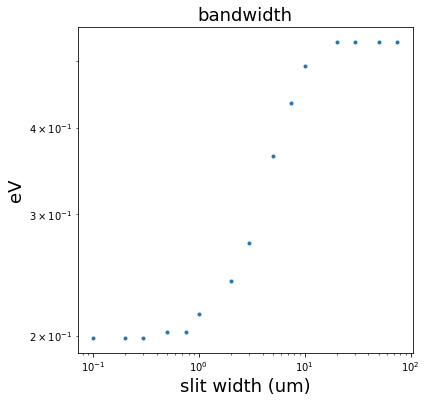

In [45]:
# calculate bandwidth from simulated result
bandwidth_list = []

for Apt_width in Apt_width_list:
    fname_cc2 = dirname_prop+'wf_{}um_slit_cc2_compressed.h5'.format(round(Apt_width,2))
    aw, axis_ev, int_ev = get_spectra_from_file(fname_cc2)
    bandwidth_list.append(calc_bandwidth(aw, axis_ev))

Apt_width_list = np.asarray(Apt_width_list)
bandwidth_list = np.asarray(bandwidth_list)

# plot
plt.figure(figsize=(6,6))
plt.plot(Apt_width_list, bandwidth_list,'.')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('slit width (um)', fontsize=18)
plt.ylabel('eV', fontsize=18)
plt.title('bandwidth', fontsize=18)

plt.savefig(strDataFolderName+'{}_bandwidth.png'.format(crystal_type), transparent=True)

### throughput

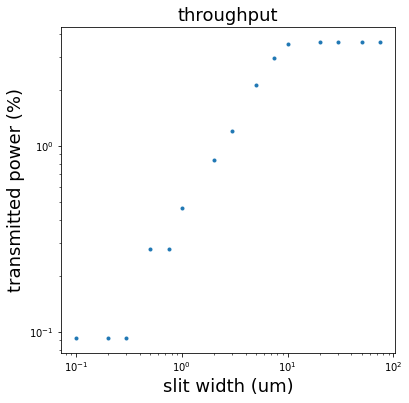

In [46]:
# calculate throughput from simulated result
throughput_list = []

fname_in = dirname_input+'incident_compressed.h5'
for i, Apt_width in enumerate(Apt_width_list):
    fname_cc2 = dirname_prop+'wf_{}um_slit_cc2_compressed.h5'.format(round(Apt_width,2))
    throughput_list.append(get_throughput_from_file(fname_in, fname_cc2))
    
throughput_list = np.asarray(throughput_list)

# plot
plt.figure(figsize=(6,6))
plt.plot(Apt_width_list, 100*throughput_list,'.')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('slit width (um)', fontsize=18)
plt.ylabel('transmitted power (%)', fontsize=18)
plt.title('throughput', fontsize=18)

plt.savefig(strDataFolderName+'{}_throughput.png'.format(crystal_type), transparent=True)

### spectral intensity

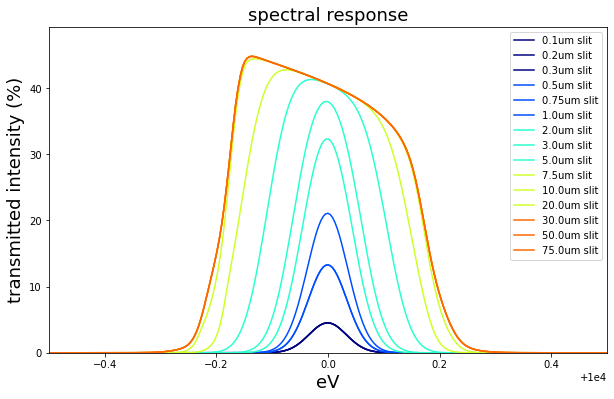

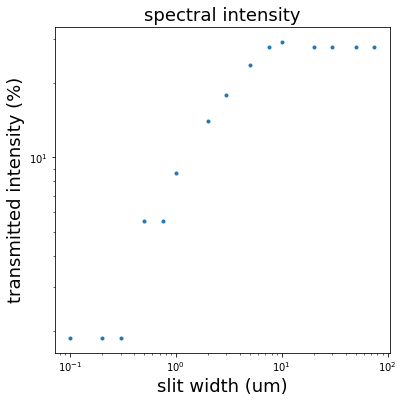

In [47]:
# calculate spectral intensity
aw_in, axis_ev, int_in = get_spectra_from_file(fname_in)

spectral_response_list = []
spectral_intensity_list = []

for i, Apt_width in enumerate(Apt_width_list):
    fname_cc2 = dirname_prop+'wf_{}um_slit_cc2_compressed.h5'.format(round(Apt_width,2))
    aw_out, _, int_out = get_spectra_from_file(fname_cc2)
    
    # spectral response
    spectral_response_list.append(calc_spectral_response(
        aw_in[aw_in.min():aw_in.max()], axis_ev[aw_in.min():aw_in.max()],
        int_in[aw_in.min():aw_in.max()], int_out[aw_in.min():aw_in.max()]))
    
    # spectral intensity (averaged spectral response over meaningful range)
    spectral_intensity_list.append(calc_spectral_intensity(aw_in, axis_ev, int_in, int_out))

spectral_response_list = np.asarray(spectral_response_list)
spectral_intensity_list = np.asarray(spectral_intensity_list)

# plot
''' spectral response '''
fig = plt.figure(figsize=(10,6))
cm = plt.get_cmap('jet')
ax = fig.add_subplot(111)
for i, Apt_width in enumerate(Apt_width_list):
    lines = ax.plot(axis_ev[aw_in.min():aw_in.max()], 100*spectral_response_list[i],label='{}um slit'.format(Apt_width))
    lines[0].set_color(cm(i//3*3.0/NN))

plt.legend()
#plt.xlim([9996,10004])
plt.xlim([9999.5,10000.5])
plt.ylim([spectral_response_list.min()*80,spectral_response_list.max()*110])
plt.xlabel('eV', fontsize=18)
plt.ylabel('transmitted intensity (%)', fontsize=18)
plt.title('spectral response', fontsize=18)
plt.savefig(strDataFolderName+'{}_spectral_response.png'.format(crystal_type), transparent=True)

''' spectral intensity '''
plt.figure(figsize=(6,6))
plt.plot(Apt_width_list, 100*spectral_intensity_list, '.')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('slit width (um)', fontsize=18)
plt.ylabel('transmitted intensity (%)', fontsize=18)
plt.title('spectral intensity', fontsize=18)

plt.savefig(strDataFolderName+'{}_spectral_intensity.png'.format(crystal_type), transparent=True)